In [681]:
#Import Libraries 
import pandas as pd 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
from sklearn.feature_selection import RFE 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## To Remove warings from the data sheet
import warnings
warnings.filterwarnings('ignore')

# Importing data

In [682]:
day = pd.read_csv("day.csv")
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Checking the Null values

In [683]:
# checking Null values
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### All the data points are non-null

### Checking size of data, columns and data itself

In [684]:
# checking the size of data
day.shape


(730, 16)

In [685]:
# checking columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [686]:
# checking few lines of data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Visualization

## Numerical Variables

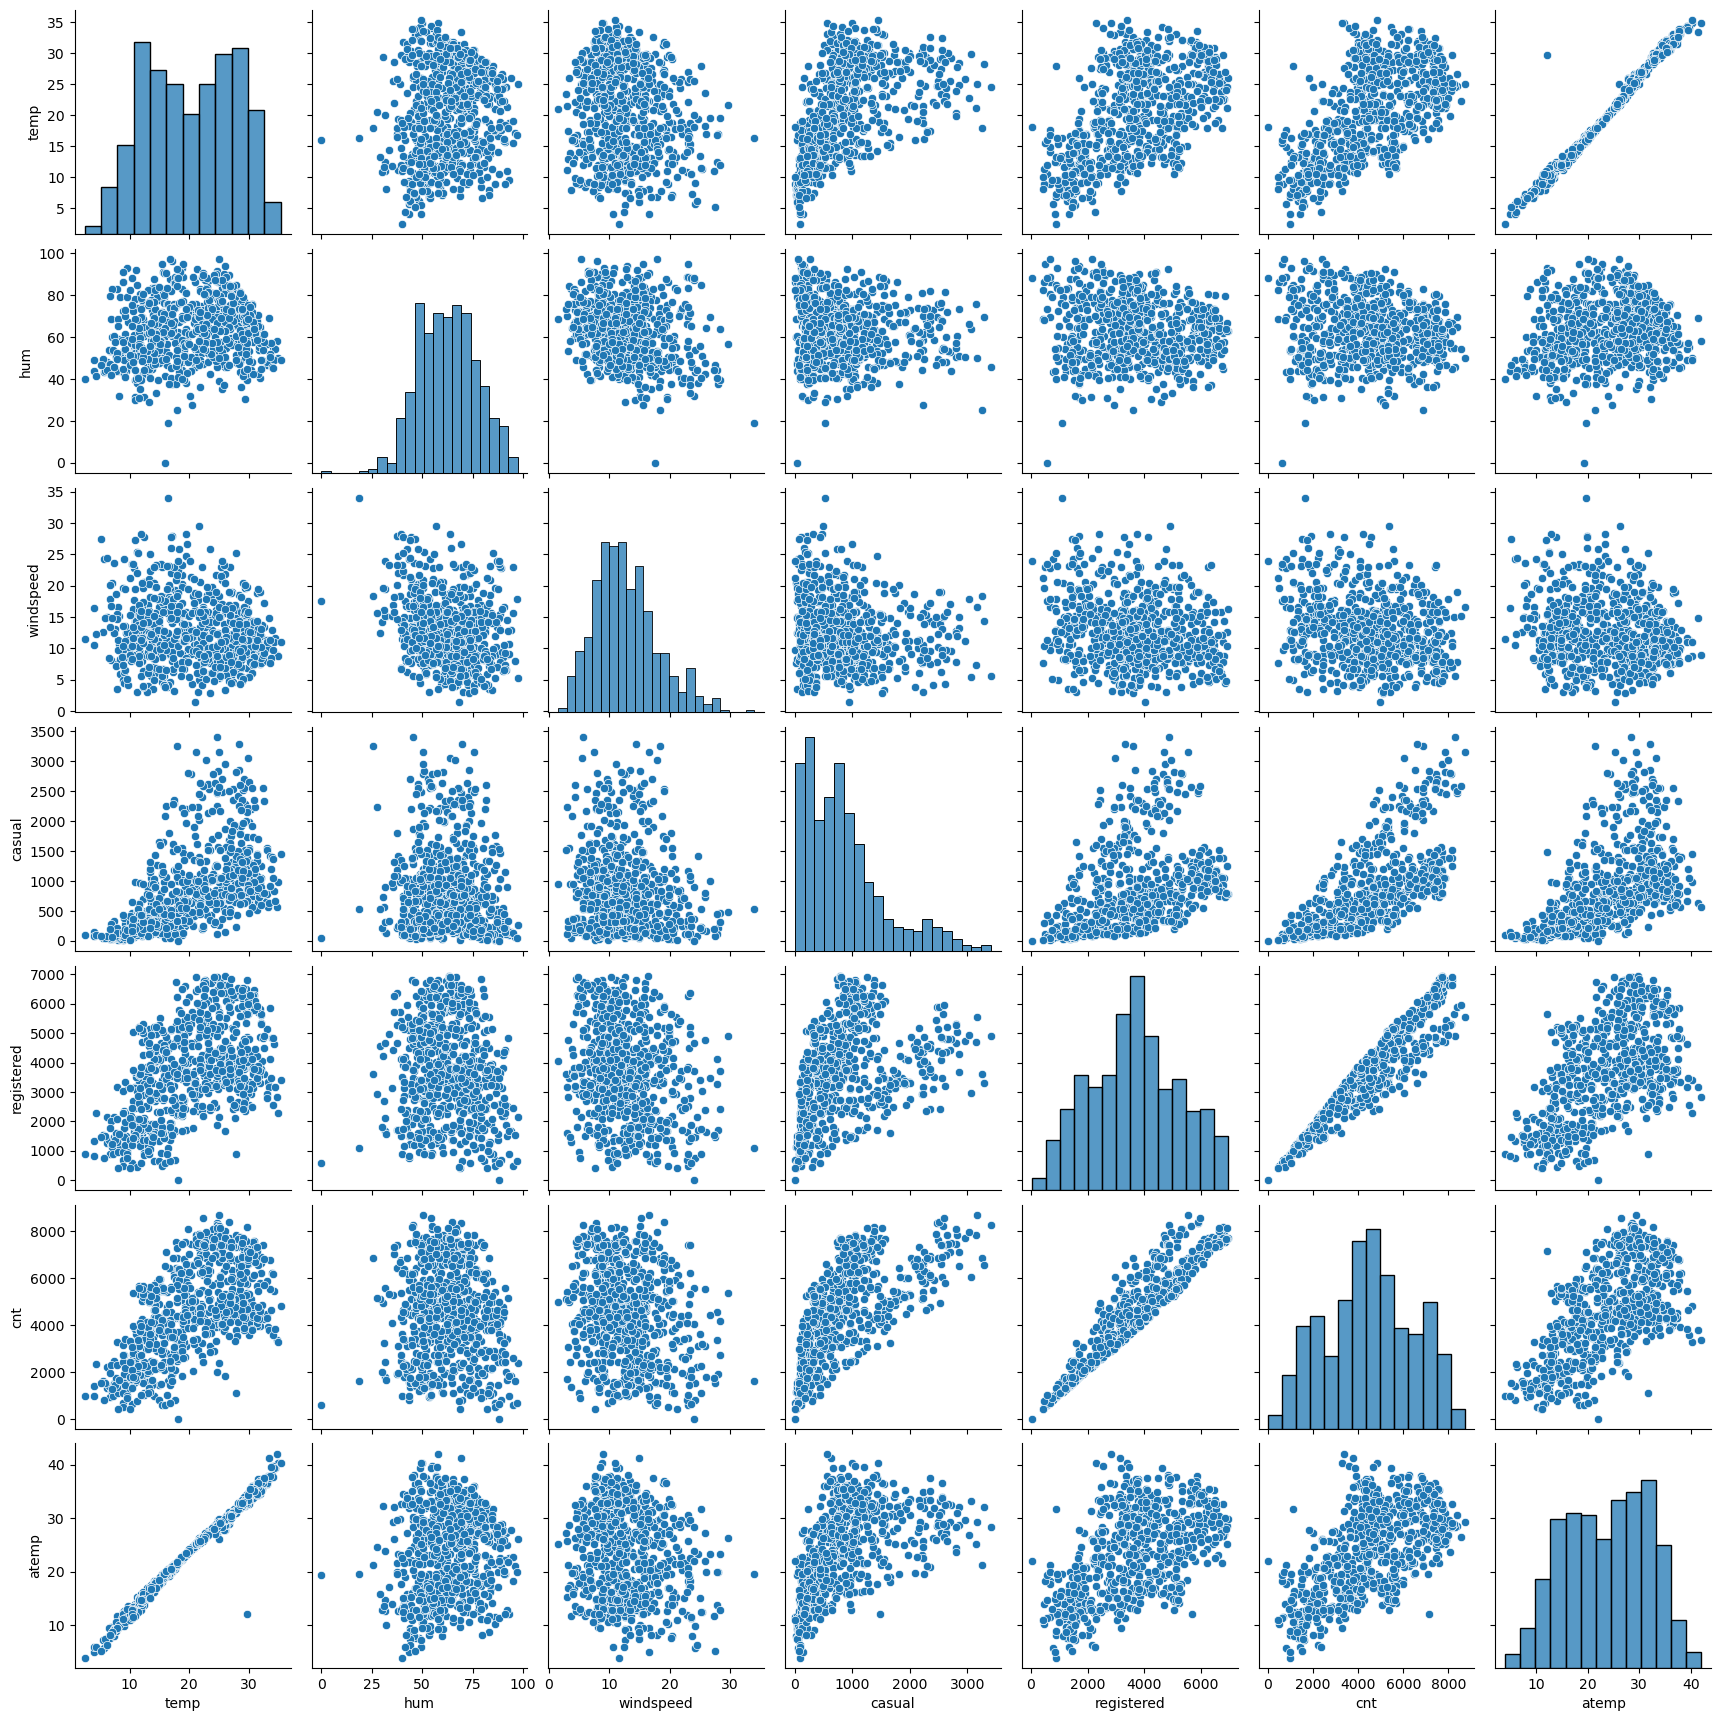

In [687]:
# visualizing numerical variables
sns.pairplot(day[["temp","hum","windspeed","casual","registered","cnt","atemp"]])
plt.show()

### Observations from above plots:
* We see some linearity between other variables and cnt so we can use a linear regression model

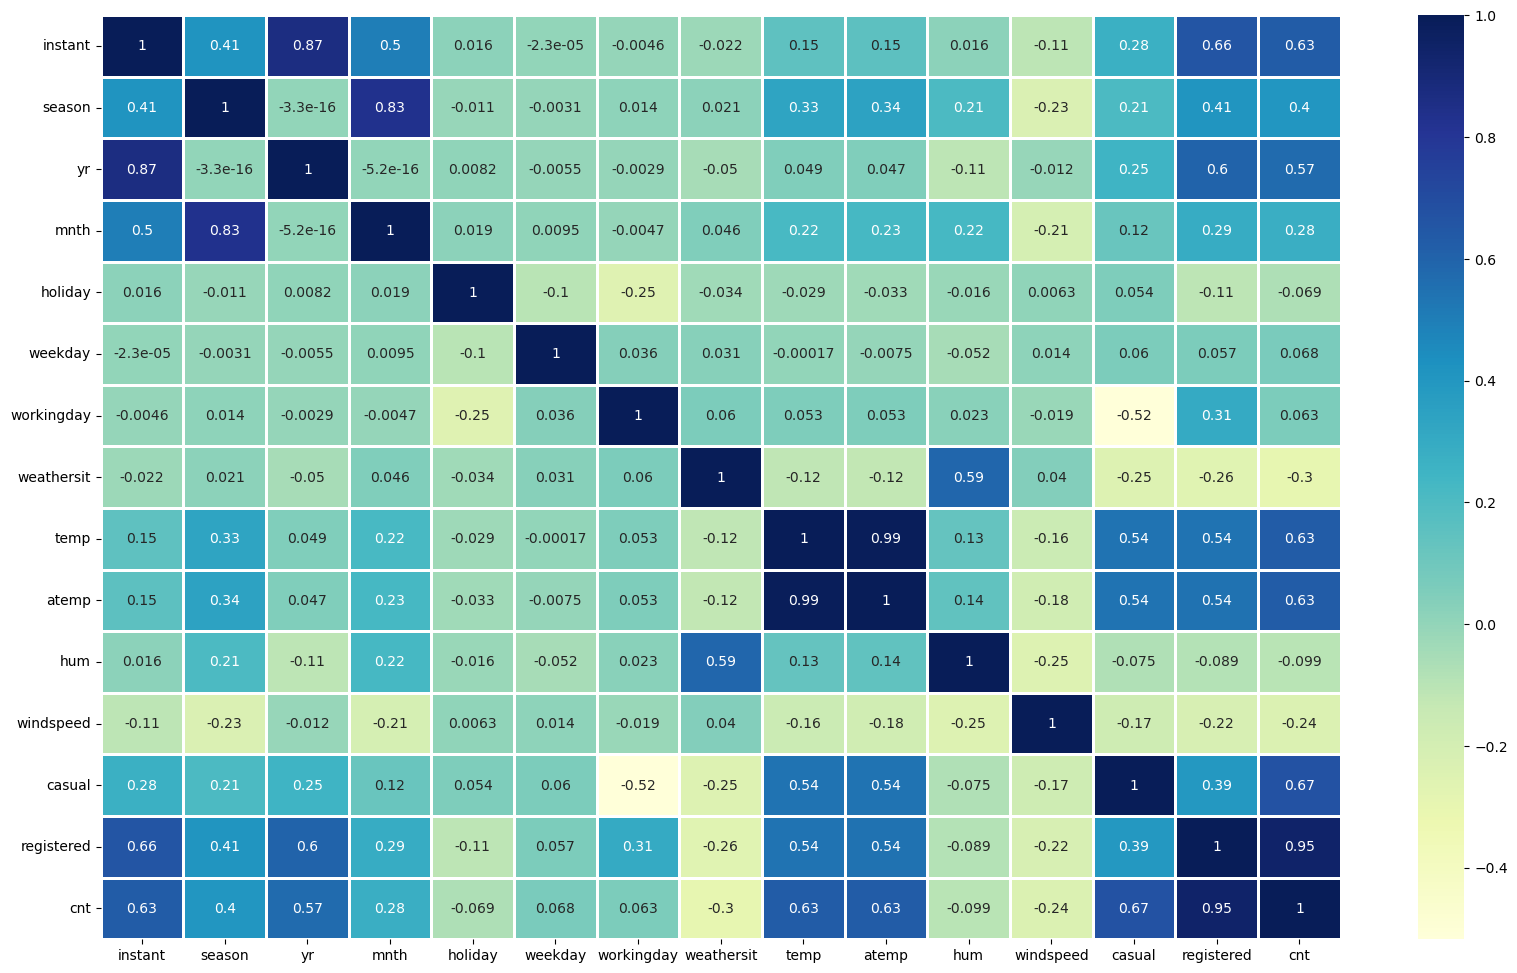

In [688]:
# Check correlations between numerical variables
plt.figure(figsize=(20, 12))
sns.heatmap(day.corr(),annot=True,cmap="YlGnBu",linewidths=1)
plt.show()

### Observtions:
* temp and atemp has a high corr with cnt which is almost same for both (0.63)
* cnt is highly coreleated with casual and registered, which is exptected causal + registered = cnt

## Catergorical variables

In [689]:
# Mapping string values to categorical columns based on the dictionary
day["season"] = day["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
day["mnth"] = day["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
day["weekday"] = day["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
day["weathersit"] = day["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Precipitation",4:"Heavy Precipitation"})
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


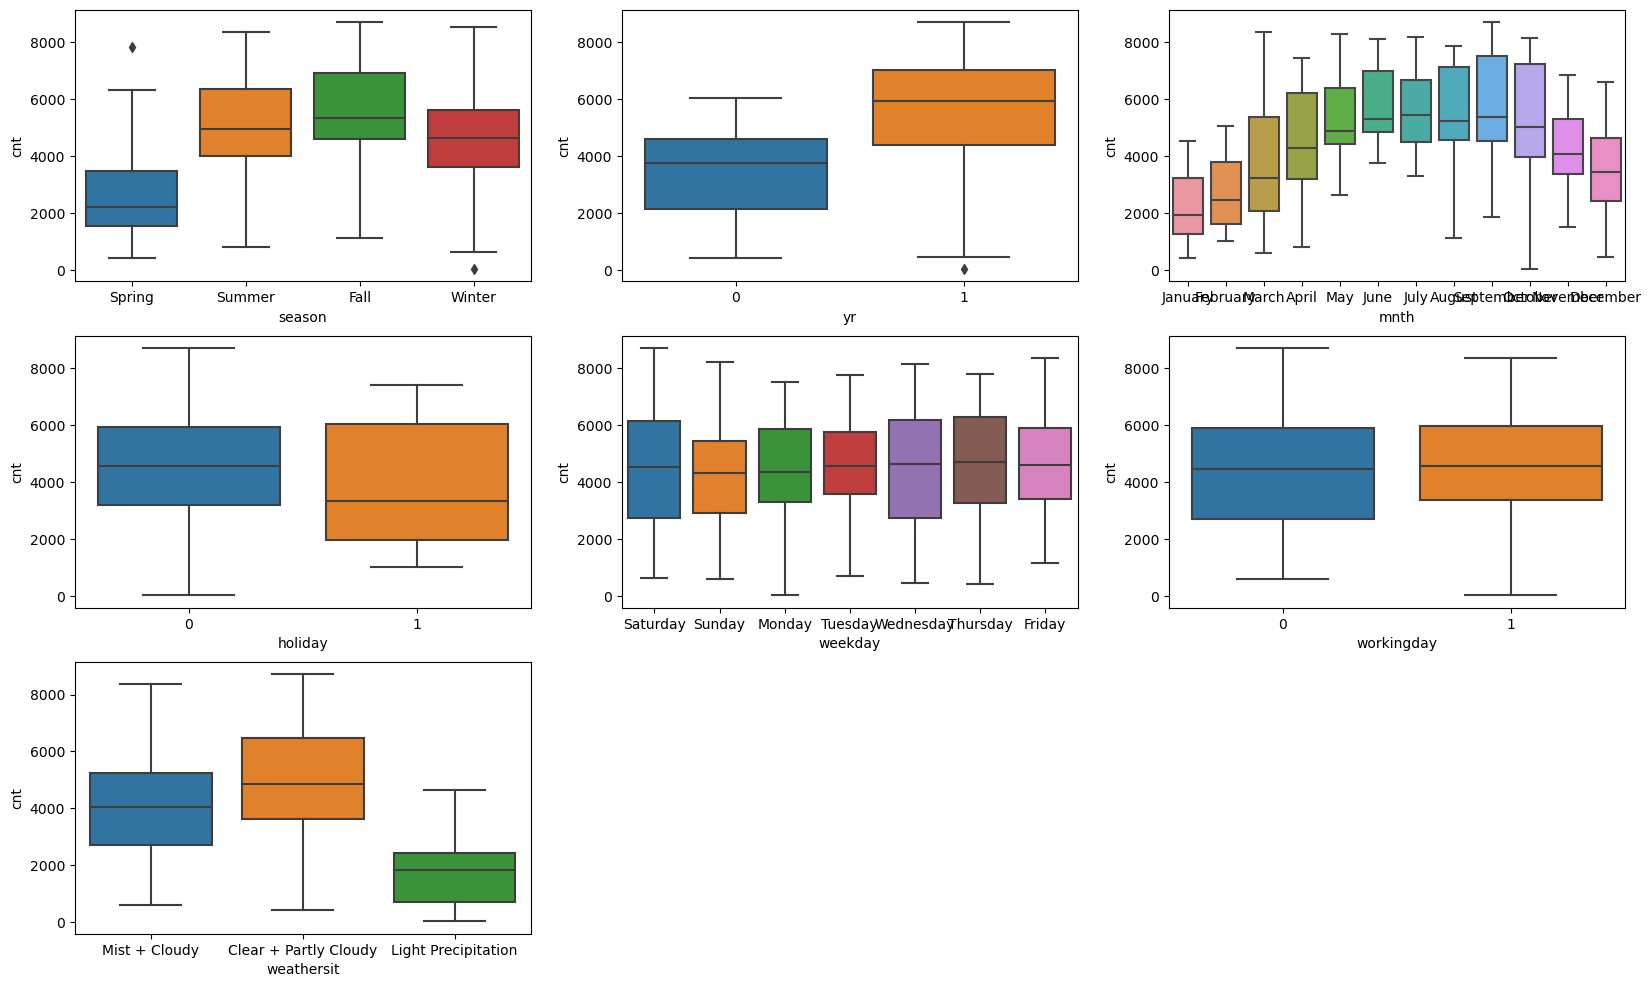

In [690]:
# visualizing categorical data
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

### Observations based on categorical data
* More users tends to use on Holidays
* There is an increasing trend in users year on year
* People uses more bikes when its clear+partly cloud conditions. Volume drops during rains and snow. 
* Sat and Wed attracted more users
* There is a positive trend from summer to fall to winter
* For months, there is an increasing trend from Mar to Oct
* Bike demand in working and non working day has almost no significant change

# Data Preparations

In [691]:
# Dropping columns which are of no use for model creation

day.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [692]:
# Creating dummy variables for categorical variables

day1 = pd.get_dummies(day,columns=["season","mnth","weekday","weathersit"],drop_first=True)
day1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [693]:
# changing data type to numeric
day1 = day1.apply(pd.to_numeric)
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   temp                            730 non-null    float64
 4   atemp                           730 non-null    float64
 5   hum                             730 non-null    float64
 6   windspeed                       730 non-null    float64
 7   cnt                             730 non-null    int64  
 8   season_Spring                   730 non-null    uint8  
 9   season_Summer                   730 non-null    uint8  
 10  season_Winter                   730 non-null    uint8  
 11  mnth_August                     730 non-null    uint8  
 12  mnth_December                   730 

### Splitting data for test and train set

In [694]:
day_train, day_test = train_test_split(day1, train_size = 0.7, test_size = 0.3, random_state = 100)
print(day_train.shape)
print(day_test.shape)

(510, 30)
(219, 30)


In [695]:
# scaling data sets
# we will be use min-max scaling to scale both  training and testing dataset
scaler = MinMaxScaler()
rescalevar = ['temp','atemp','hum','windspeed','cnt']
day_train[rescalevar] = scaler.fit_transform(day_train[rescalevar])
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [696]:
# transform test dataset 
day_test[rescalevar] = scaler.transform(day_test[rescalevar])
day_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


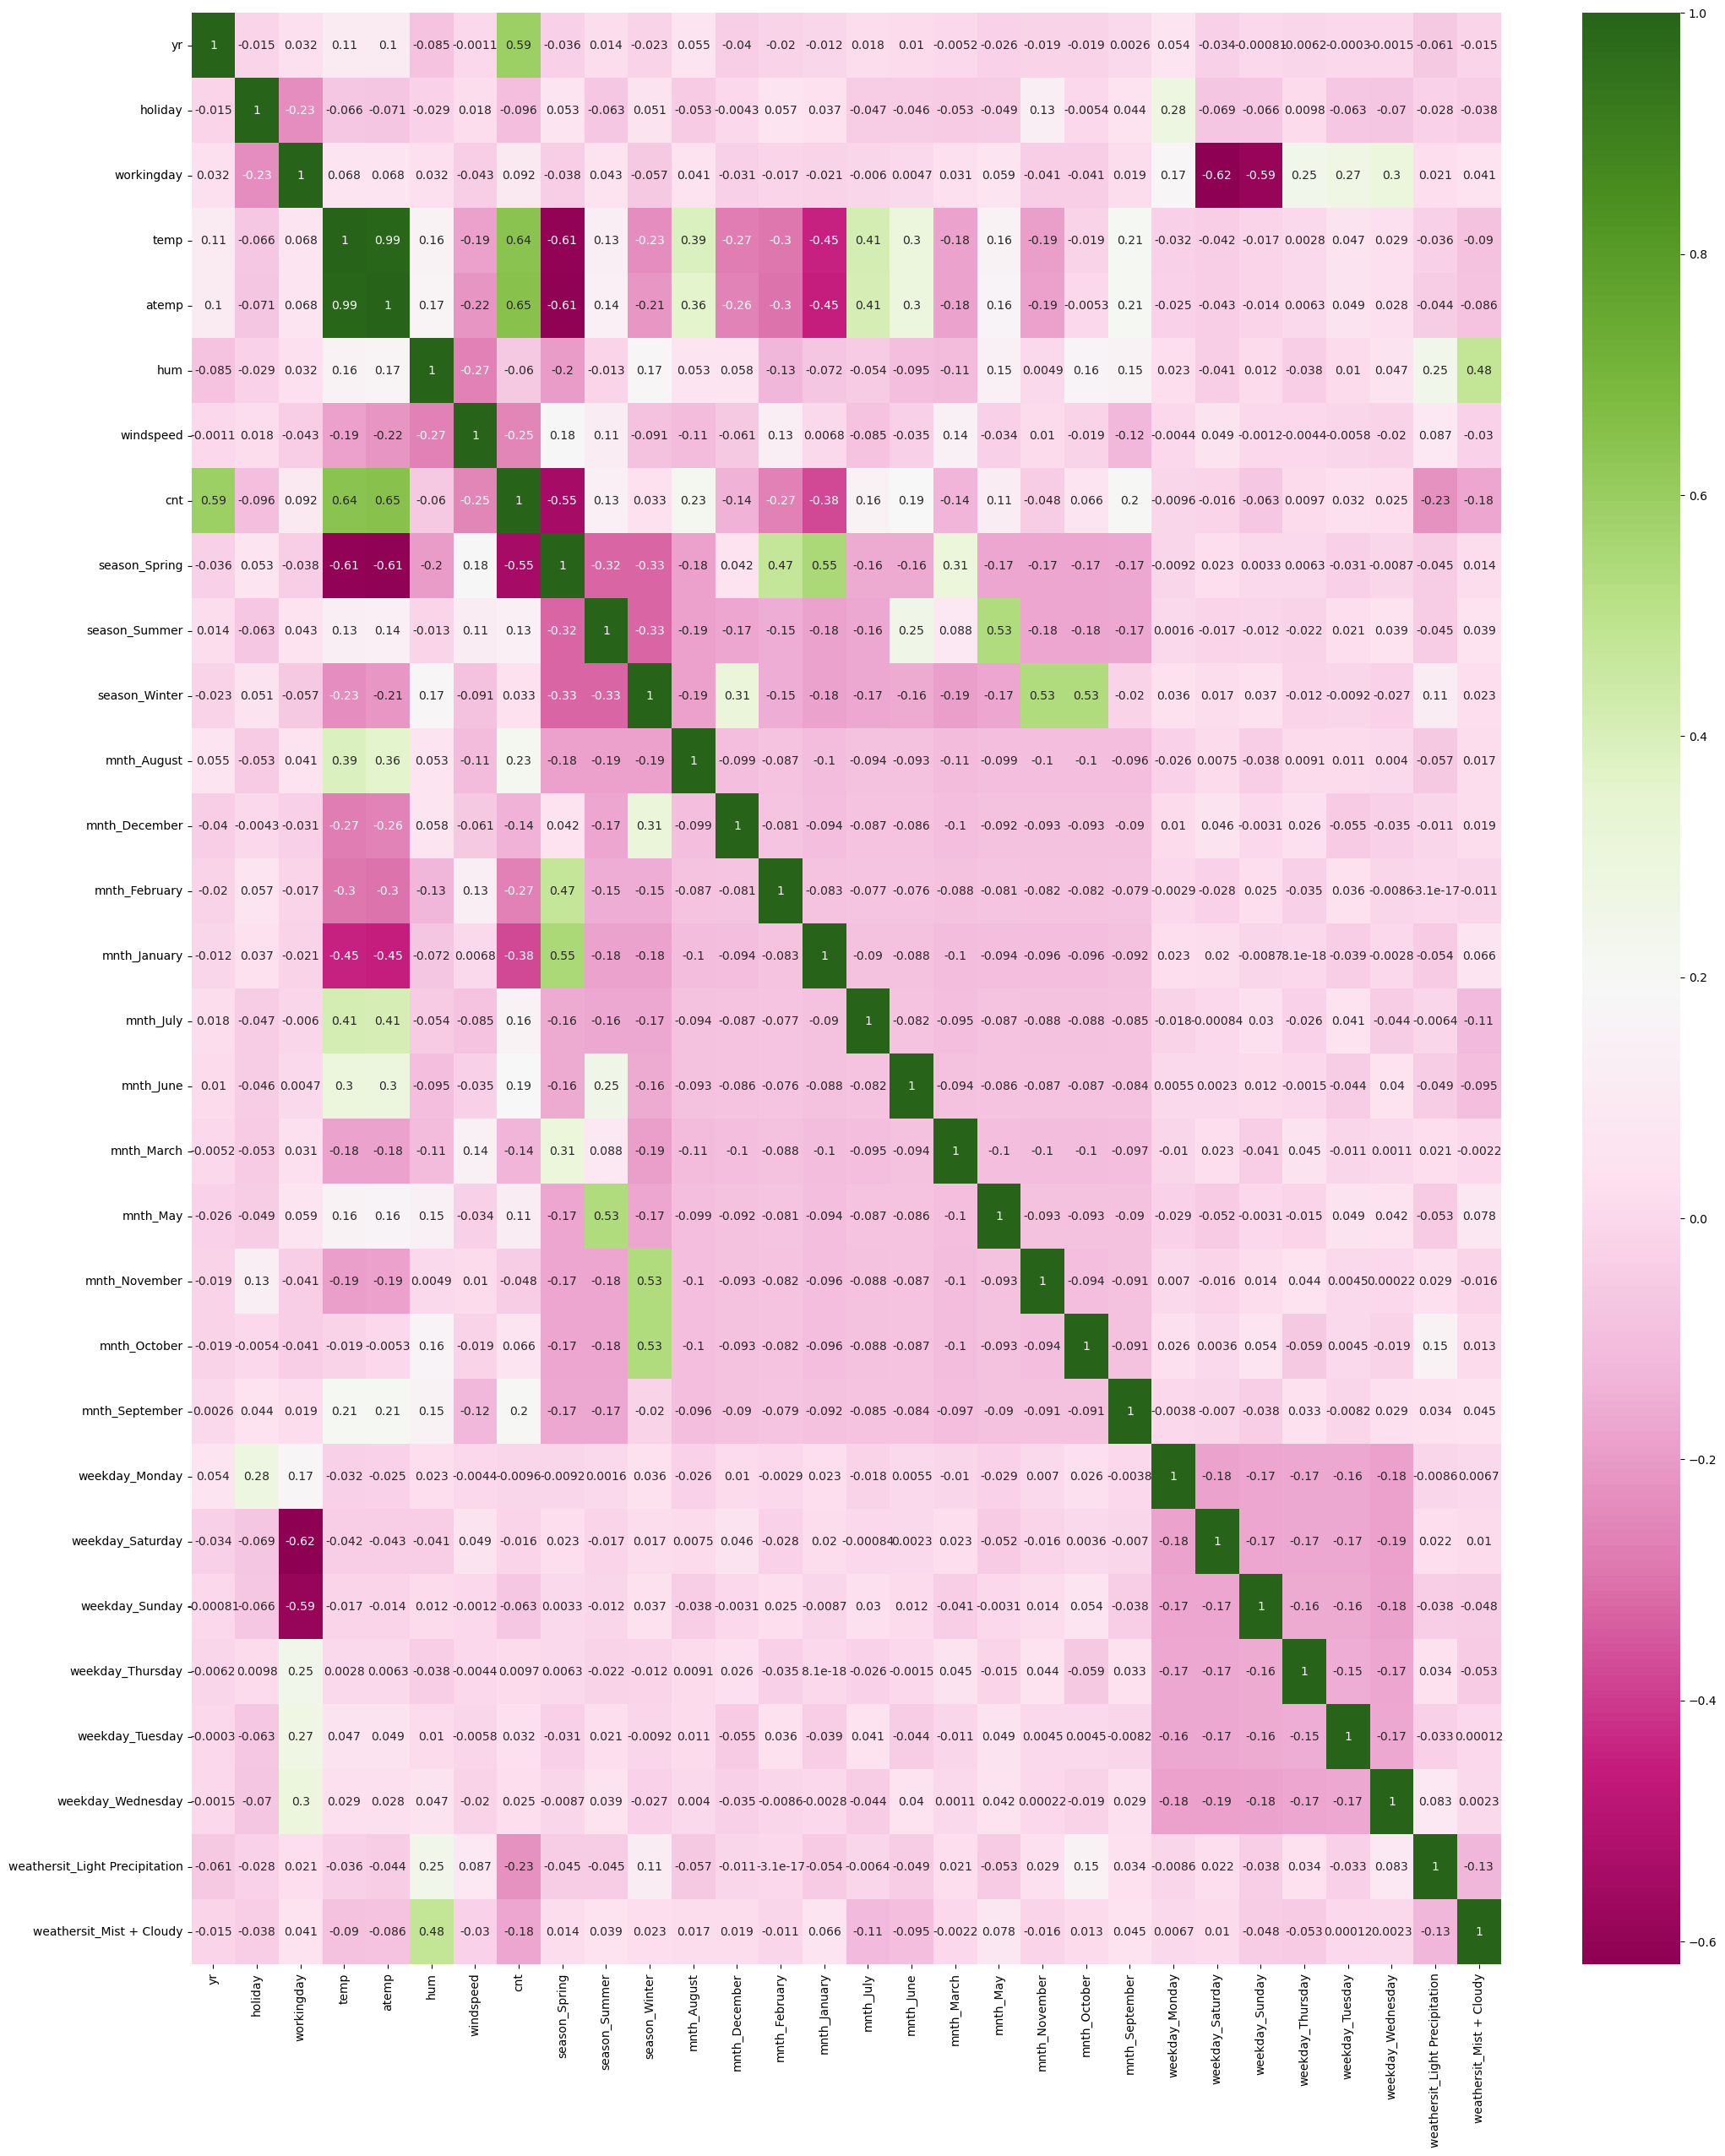

In [697]:
# Creating Headmap
plt.figure(figsize = (25,30))
sns.heatmap(day_train.corr(), annot = True, cmap = "PiYG")
plt.show()

### Obserations:
* cnt has good corelation with temp and atemp variables
* May-August has positive corelation where as other month have negative with temp
* Sat-Sun has strong negative corelation with Working Day
* Cnt has positiv coreatlion (0.59) with yr

# Model Building

In [698]:
# diving train data in to X and y for model building.
# Since cnt varaible is highly corelated we will start with it and then later add more variables
y_train = day_train.pop('cnt')
X_train = day_train

In [699]:
# Running RFE with output number of variables as 15

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)

# Checking the columns which were deemed suitable by RFE for model building
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_August', 'mnth_July', 'mnth_November',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Precipitation'],
      dtype='object')

In [700]:
# Creating X_train_ref with RFE variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,mnth_August,mnth_July,mnth_November,weekday_Saturday,weekday_Sunday,weathersit_Light Precipitation
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,1,0,0


In [701]:
# Adding constant variable

X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          6.07e-178
Time:                        23:51:08   Log-Likelihood:                 482.43
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     496   BIC:                            -877.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [702]:
# Dropping constant

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

### Rebuilding Model after dropping Holiday due to high p-value : Model 2

In [703]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          6.07e-178
Time:                        23:51:08   Log-Likelihood:                 482.43
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     496   BIC:                            -877.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [704]:
# Checking VIF for all variables of new model 2

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,368.24
3,atemp,363.76
4,hum,18.50
1,workingday,16.16
5,windspeed,4.77
10,weekday_Saturday,4.37
11,weekday_Sunday,4.21
6,season_Spring,2.15
0,yr,2.07
7,mnth_August,1.51


### Rebuilding Model after dropping mnth_November due to high p-value : Model 3

In [705]:
X_train_new = X_train_new.drop(["mnth_November"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          4.46e-179
Time:                        23:51:08   Log-Likelihood:                 482.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     497   BIC:                            -883.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [706]:
# Checking VIF for all variables of new model 3

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,365.49
3,atemp,363.30
4,hum,17.88
1,workingday,16.07
5,windspeed,4.70
9,weekday_Saturday,4.35
10,weekday_Sunday,4.19
0,yr,2.06
6,season_Spring,1.96
7,mnth_August,1.51


### rebuilding model after dropping temp due to high VIF value : Model 4

In [707]:
# Dropping temp since it has very high VIF when all variables are significant

X_train_new = X_train_new.drop(["temp"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.60e-178
Time:                        23:51:08   Log-Likelihood:                 478.29
No. Observations:                 510   AIC:                            -932.6
Df Residuals:                     498   BIC:                            -881.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [708]:
# Checking VIF for all variables of new model 4

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.87
1,workingday,16.06
2,atemp,14.21
4,windspeed,4.49
8,weekday_Saturday,4.35
9,weekday_Sunday,4.19
0,yr,2.06
5,season_Spring,1.96
7,mnth_July,1.47
6,mnth_August,1.39


### Rebuilding Model after removing hum due to high VIF value: Model 5

In [709]:

X_train_new = X_train_new.drop(["hum"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     200.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.09e-167
Time:                        23:51:09   Log-Likelihood:                 449.88
No. Observations:                 510   AIC:                            -877.8
Df Residuals:                     499   BIC:                            -831.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [710]:
# Checking VIF for all variables of new model 5

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,11.99
1,workingday,10.40
3,windspeed,4.47
7,weekday_Saturday,3.09
8,weekday_Sunday,2.92
0,yr,2.06
4,season_Spring,1.91
6,mnth_July,1.39
5,mnth_August,1.37
9,weathersit_Light Precipitation,1.06


### Rebuilding afer dropping working day as it has high VIF value : Model 6

In [711]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.79e-167
Time:                        23:51:09   Log-Likelihood:                 446.13
No. Observations:                 510   AIC:                            -872.3
Df Residuals:                     500   BIC:                            -829.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [712]:
# Checking VIF for all variables of new model 6

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.78
2,windspeed,3.82
0,yr,2.03
3,season_Spring,1.50
4,mnth_August,1.34
5,mnth_July,1.33
6,weekday_Saturday,1.21
7,weekday_Sunday,1.19
8,weathersit_Light Precipitation,1.05


### Remodelling by adding 'season_winter' to the model: Model 7

In [713]:
X_train_new['season_Winter']=X_train['season_Winter']

# X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.08e-167
Time:                        23:51:09   Log-Likelihood:                 449.89
No. Observations:                 510   AIC:                            -877.8
Df Residuals:                     499   BIC:                            -831.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [714]:
# Checking VIF for all variables of new model 7

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.88
2,windspeed,3.94
0,yr,2.05
3,season_Spring,1.63
9,season_Winter,1.46
4,mnth_August,1.41
5,mnth_July,1.40
6,weekday_Saturday,1.22
7,weekday_Sunday,1.20
8,weathersit_Light Precipitation,1.06


* VIF is still below 5 and the R-square value is increased by 0.01%. So keeping the variable

### Rebuilding the model by dropping Weekday_saturday as it is having high p-value: Model 8

In [715]:
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     222.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.54e-168
Time:                        23:51:09   Log-Likelihood:                 449.09
No. Observations:                 510   AIC:                            -878.2
Df Residuals:                     500   BIC:                            -835.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [716]:
# Checking VIF for all variables of new model 8

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.84
2,windspeed,3.90
0,yr,2.05
3,season_Spring,1.61
8,season_Winter,1.45
4,mnth_August,1.41
5,mnth_July,1.40
6,weekday_Sunday,1.17
7,weathersit_Light Precipitation,1.06


* R-squared value is 80.0% and adjusted R-square is 79.9% which is quite good to accept the model
* All the variables now significant and VIF value < 5

# Residual Analysis

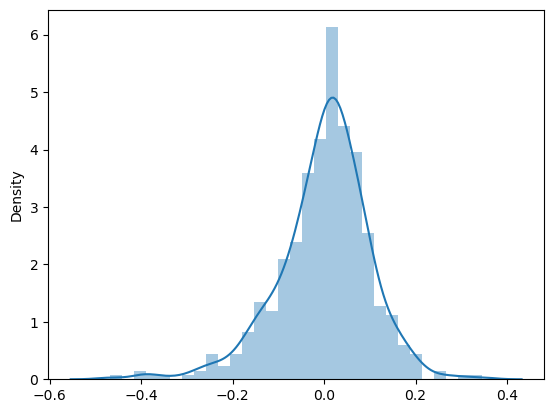

In [717]:
# Creating y_train_pred

y_train_pred = lm.predict(X_train_lm)

# Normality of Error terms

res = y_train - y_train_pred
#Visualiing the spread for error
sns.distplot(res)
plt.show()

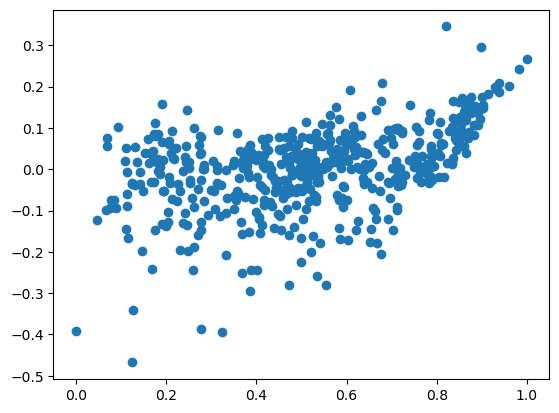

In [718]:
plt.scatter(y_train,res)
plt.show()

* NO pattern visible in the residual indicating that the error terms are independent.

### Validating Assumptions on Linear Regression

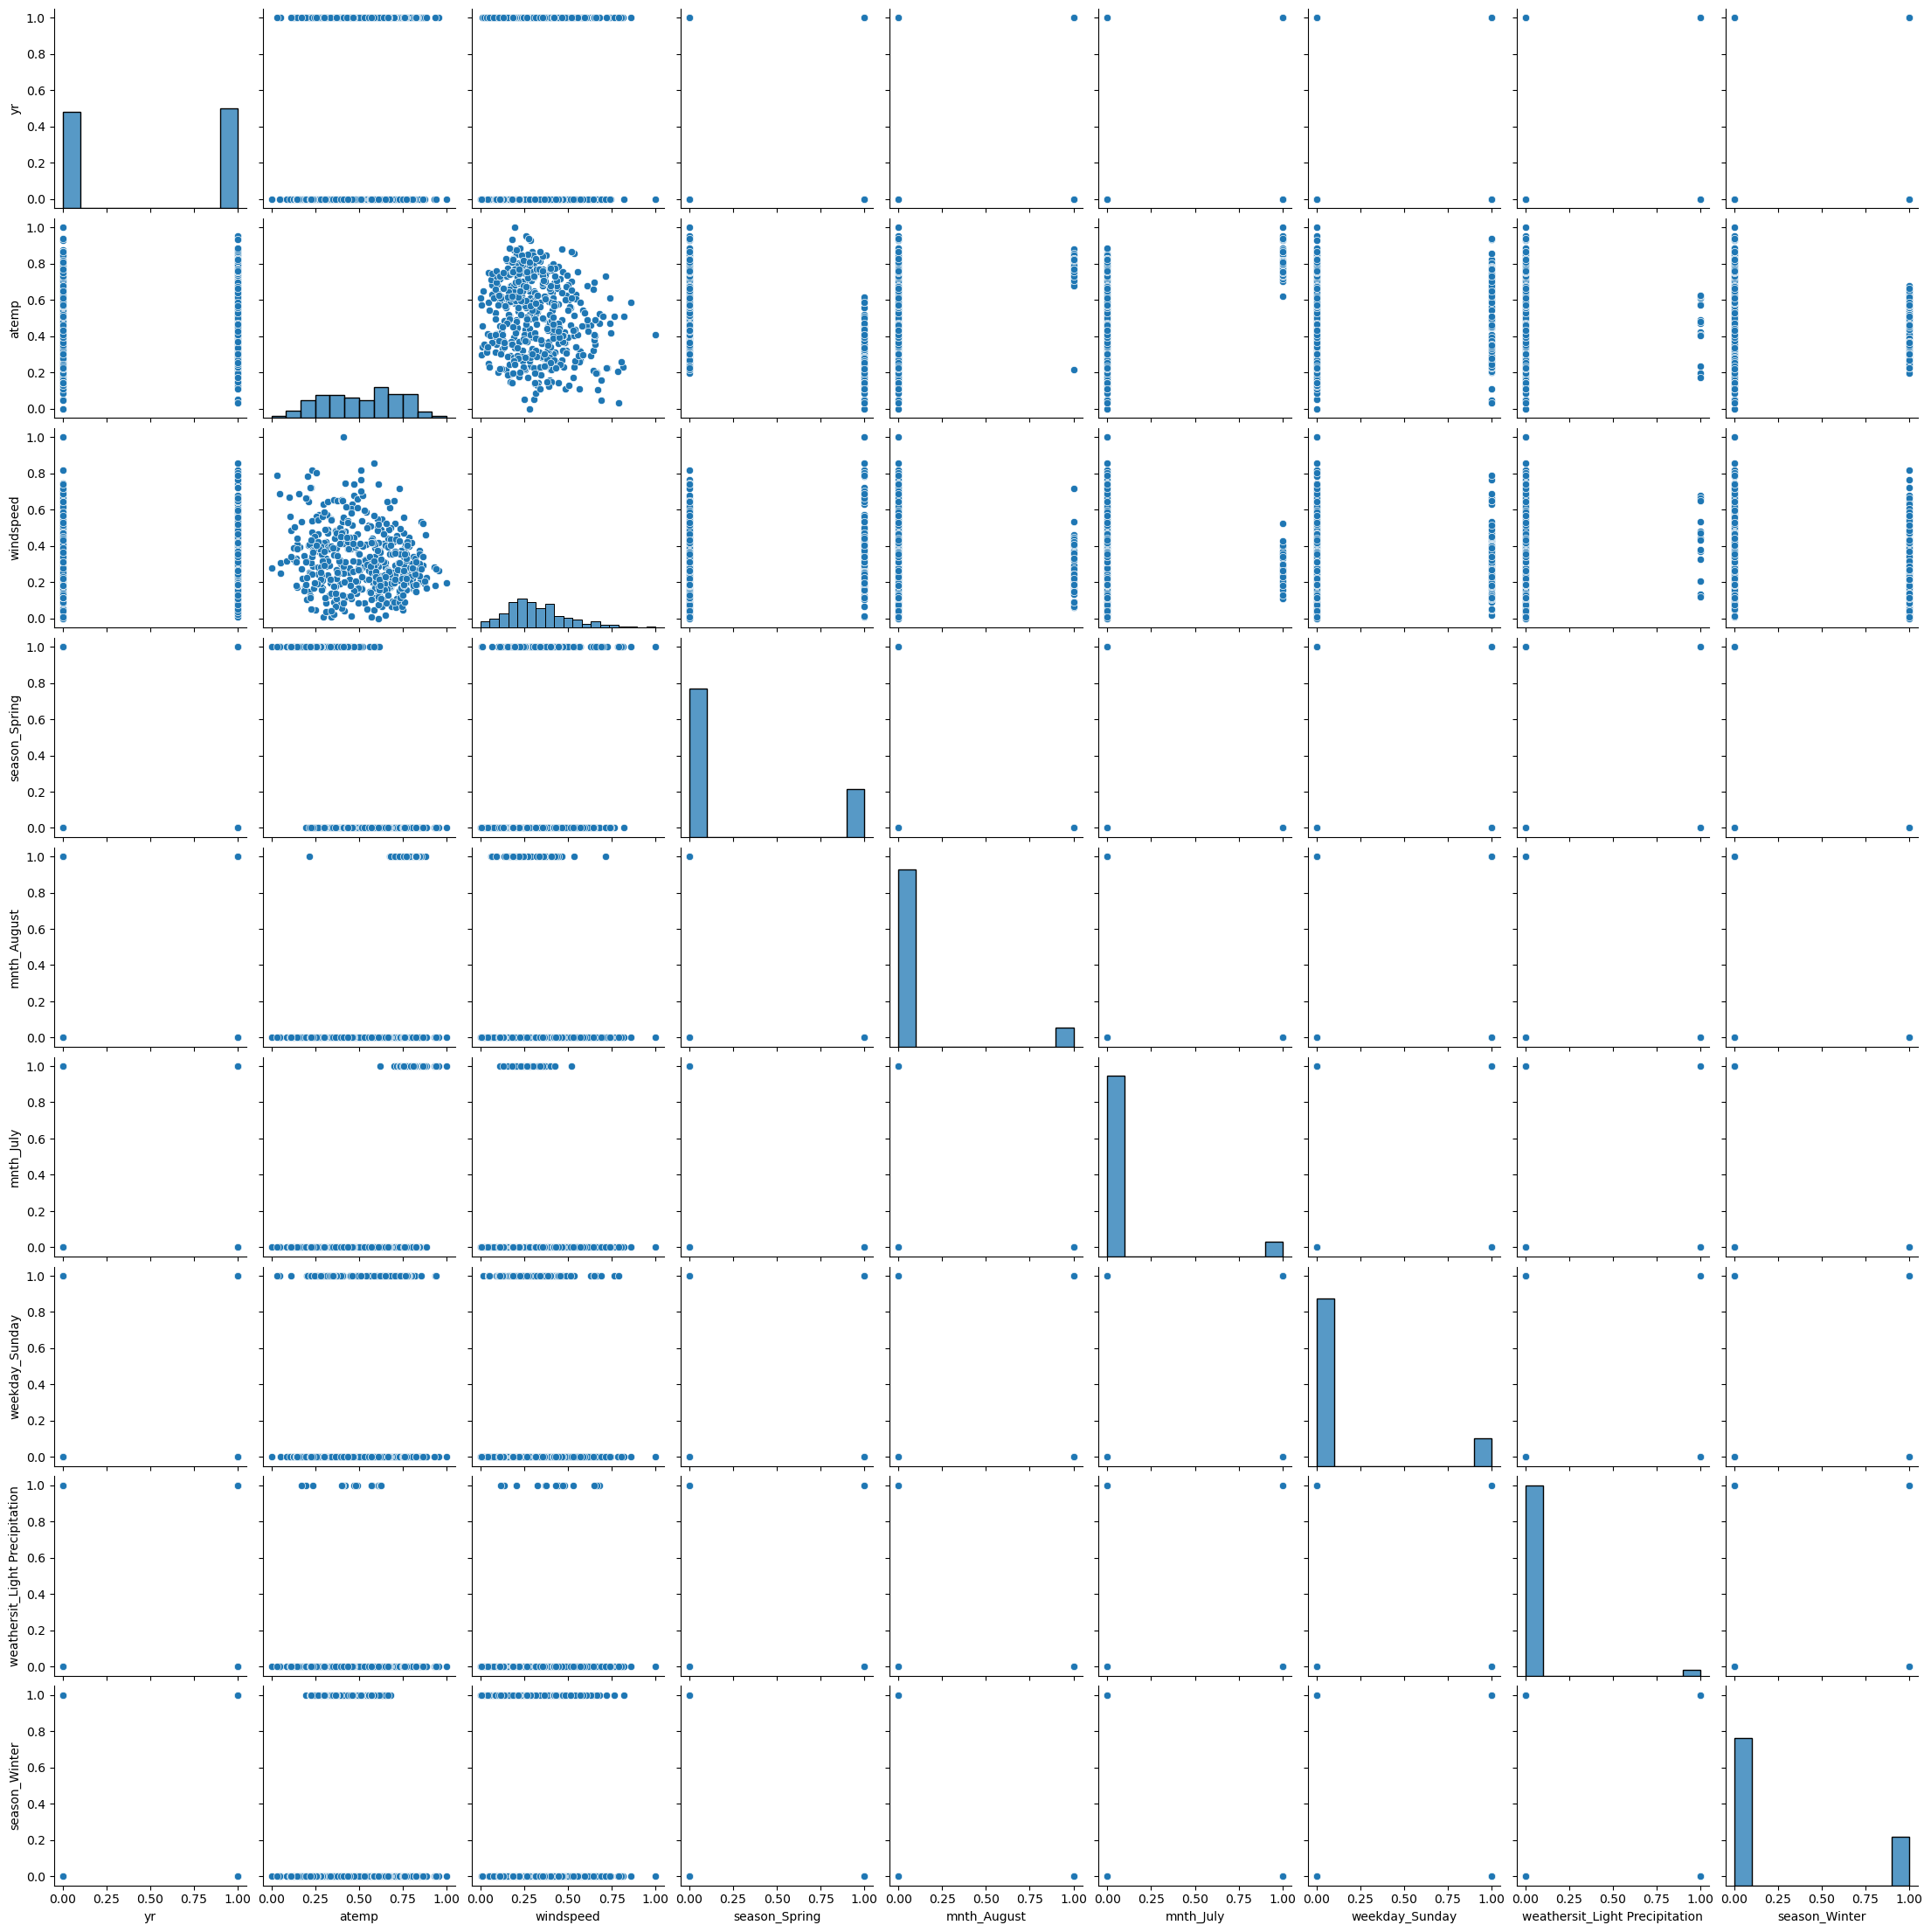

In [719]:
# Checking if there is linearity between any variable and cnt to verify if a linear regression model can be used

sns.pairplot(X_train_new)
plt.show()

* NO pattern is visible in above


In [720]:
#checking Curbin-Watson value for the final model
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     222.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.54e-168
Time:                        23:52:23   Log-Likelihood:                 449.09
No. Observations:                 510   AIC:                            -878.2
Df Residuals:                     500   BIC:                            -835.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

* Durbin-Watson values is close to 2 (1.91) indicating no first-order autocorealtion
* VIF for all feature variable is below 5 so there is no multicollinearity

# Prediction using the Final Model

In [721]:
#rescalevar

day_test[rescalevar]=scaler.fit_transform(day_test[rescalevar])
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [722]:
y_test = day_test.pop('cnt')
X_test = day_test

In [723]:
# Creating X_test_new after droppping variables which are not there in the final model

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable

X_test_new = sm.add_constant(X_test_new)

# Making predictions using final model

y_test_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

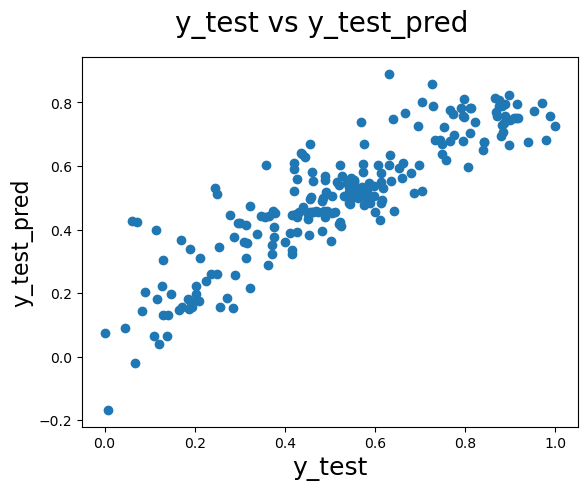

In [724]:
# Visualizing y_test vs y_test_pred

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

In [725]:
# calcualting R-squared on final model test set

r2 = r2_score(y_test, y_test_pred)
print(r2)

0.7780225420753769


In [726]:
# Calcualting Adjusted R-squared value for the final model on test set

Adj_r2 = 1-(1-r2)*((day_test.shape[0]-1)/(day_test.shape[0]-10-1))
print(Adj_r2)

0.7673505489059238


* R-squared value for train data set is 80.0% and for test data set is 77.80%
* Adjusted R-square for train data set is 79.9% and for test data set is 76.73%

# Case Summary:
 Below factor/variables plays an important role in the bike demands
 1. atemp	
 2. windspeed	
 3. yr	
 4.	season_Spring	
 5. season_Winter	
 6.	mnth_August	
 7.	mnth_July	
 8.	weekday_Sunday	
 9. weathersit_Light Precipitation	